# Visualização de dados - Desafio Final

Bootcamp Data Analytics 2024

_Autor: Letícia Simões_

## Requisitos
Instalação do módulo Dash no ambiente.
```
!pip install dash
```

In [1]:
#!pip install dash

## Bibliotecas

In [2]:
#Bibliotecas usadas
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px

from dash import Dash, dcc, html, Input, Output
from statsmodels.tsa.seasonal  import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

## Proposta do Desafio - Parte I

### Descrição
Neste desafio, seu objetivo é visualizar dados de diferentes formas utilizando as bibliotecas Matplotlib, Seaborn e Plotly. Crie gráficos que mostrem a distribuição dos dados, correlações entre variáveis e tendências.

### Tarefas
1. Carregue os dados de um arquivo CSV fornecido (`saude.csv`).
2. Crie um histograma da variável `age` usando **Matplotlib**.
3. Crie um gráfico de dispersão mostrando a relação entre `height` e `weight`usando **Seaborn**.
4. Crie um gráfico interativo de barras mostrando a contagem de indivíduos por `gender` usando **Plotly**.
5. Use sua criatividade para gerar insights e explorar os dados, criando novas visualizações a partir da base de dados fornecida.




### Conhecendo a base de dados

In [3]:
# Importação da base de dados
df_saude = pd.read_csv("saude.csv")

# Visualizando os dados
df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


In [4]:
# Tipos de variáveis
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   age     10 non-null     int64 
 2   height  10 non-null     int64 
 3   weight  10 non-null     int64 
 4   gender  10 non-null     object
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [5]:
# Estatísticas descritivas das variáveis numéricas
df_saude.describe()

,id,age,height,weight
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,34.800000,167.800000,72.600000
std,3.02765,8.753412,7.857056,11.057426
min,1.00000,23.000000,155.000000,55.000000
25%,3.25000,28.250000,161.250000,65.750000
50%,5.50000,35.000000,169.000000,72.500000
75%,7.75000,39.500000,173.750000,79.500000
max,10.00000,50.000000,180.000000,90.000000


In [6]:
# Estatísticas descritivas das variáveis categóricas
df_saude.describe(include=["object"])

,gender
count,10
unique,2
top,M
freq,5


In [7]:
# Valores únicos para coluna "gender"
df_saude["gender"].unique()

array(['M', 'F'], dtype=object)

In [8]:
# Valores faltantes
df_saude.isnull().sum()

id        0
age       0
height    0
weight    0
gender    0
dtype: int64

### Histogramas com `Matplotlib`

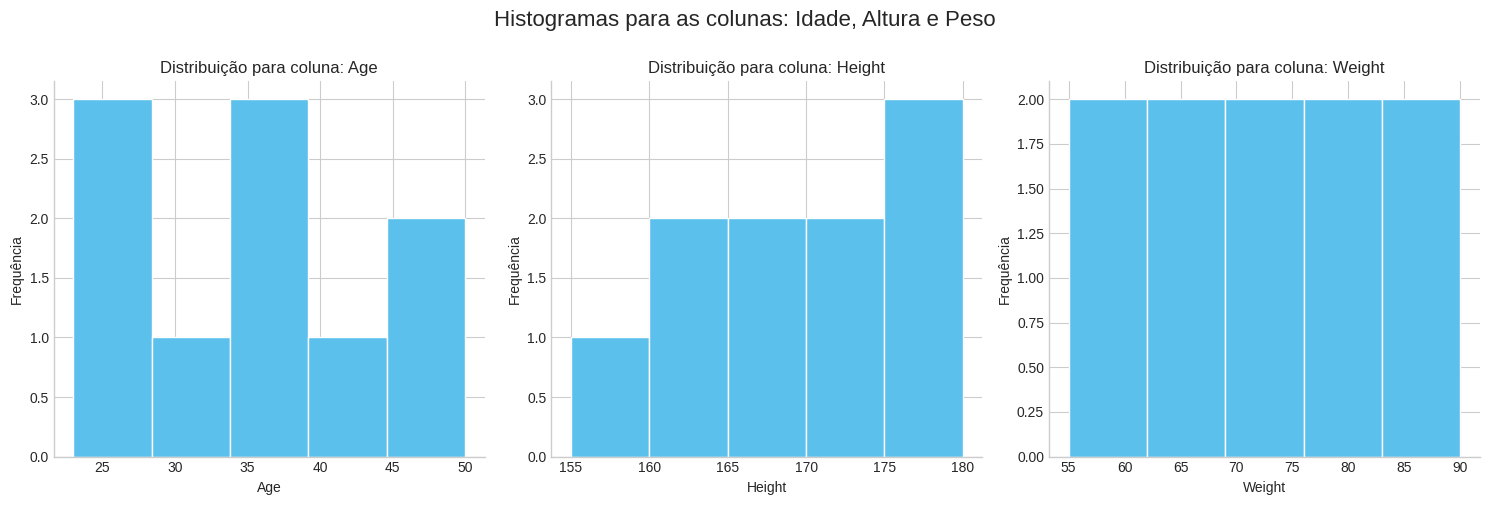

In [9]:
# Gera histogramas para múltiplas colunas de um DataFrame, em subplots lado a lado

# Definindo o estilo
plt.style.use("seaborn-v0_8-whitegrid")

# Criando a figura e definindo os eixos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Lista de colunas
colunas = ["age", "height", "weight"]

# Iterando pelas colunas e eixos para criar os histogramas
for ax, coluna in zip(axes, colunas):
    ax.hist(df_saude[coluna], bins=5, color="#5BC0EB", edgecolor="white")

    # Definindo título e rótulos
    ax.set_title(f"Distribuição para coluna: {coluna.capitalize()}")
    ax.set_xlabel(coluna.capitalize())
    ax.set_ylabel("Frequência")

    # Removendo as spines do topo e da direita
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Definindo título
fig.suptitle("Histogramas para as colunas: Idade, Altura e Peso", fontsize=16, y=1)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### Gráficos de Dispersão com `Seaborn`

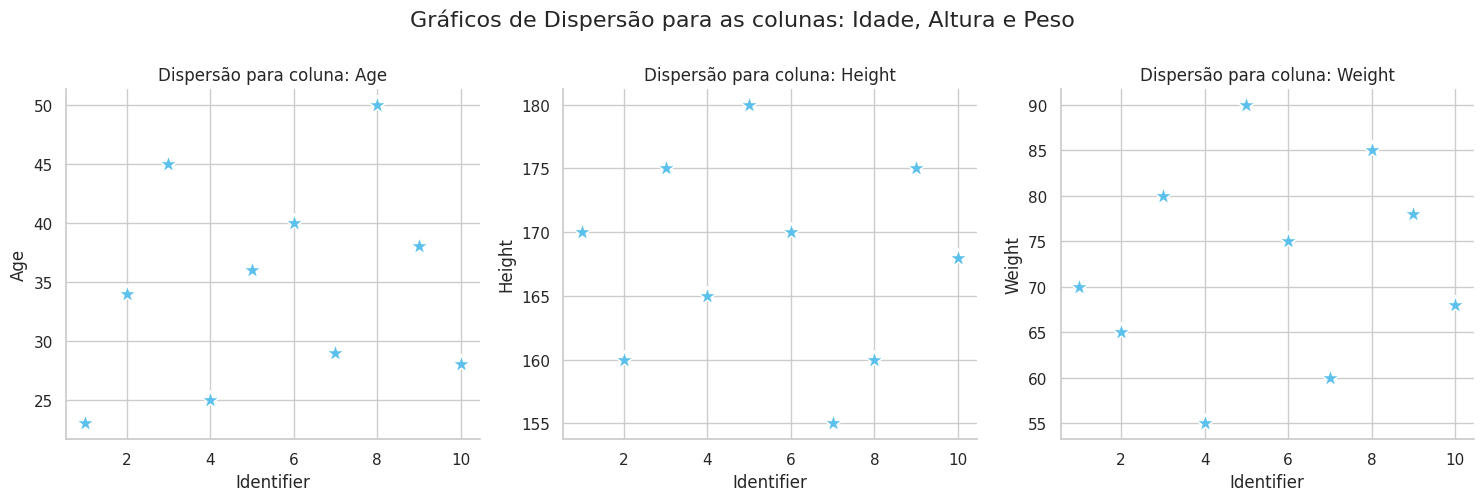

In [10]:
# Gerar scatterplots para múltiplas colunas de um DataFrame, em subplots lado a lado

# Definindo o estilo
sns.set(style="whitegrid")

# Criando a figura e definindo os eixos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Lista de colunas
colunas = ["age", "height", "weight"]

# Iterando pelas colunas e eixos para criar os scatterplots
for ax, coluna in zip(axes, colunas):
    sns.scatterplot(
        x="id", y=coluna, data=df_saude, ax=ax, marker="*", s=200, color="#5BC0EB"
    )

    # Definindo título e rótulos
    ax.set_title(f"Dispersão para coluna: {coluna.capitalize()}")
    ax.set_xlabel("Identifier")
    ax.set_ylabel(coluna.capitalize())

    # Removendo as spines do topo e da direita
    sns.despine(ax=ax, top=True, right=True)

# Definindo título
fig.suptitle("Gráficos de Dispersão para as colunas: Idade, Altura e Peso", fontsize=16, y=1)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

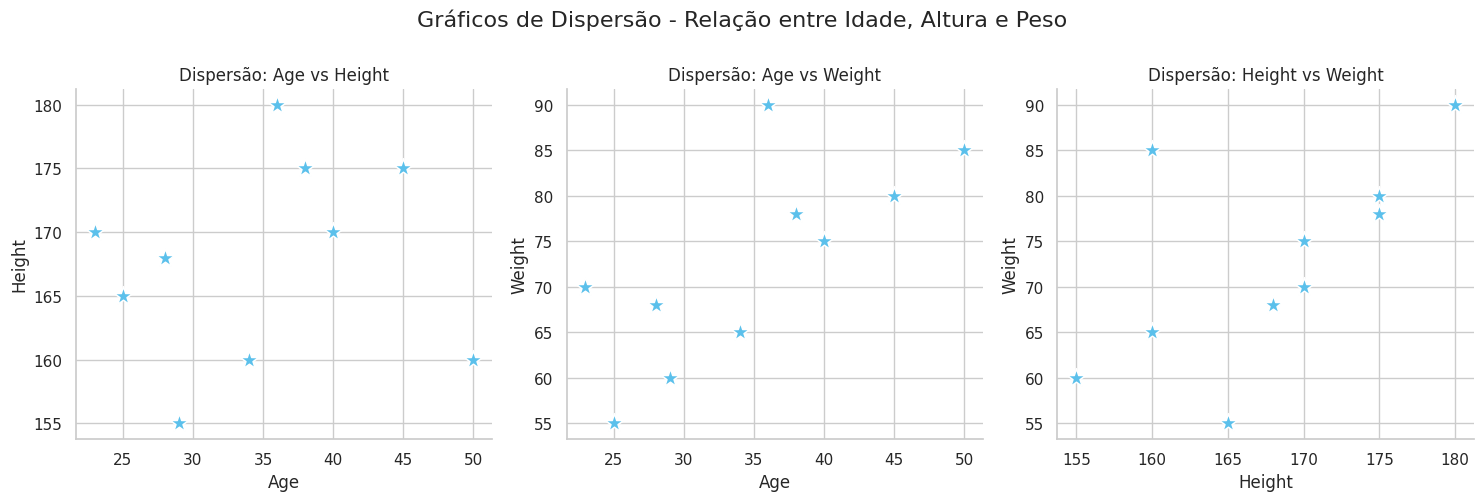

In [11]:
# Gerar scatterplots para múltiplas colunas de um DataFrame, em subplots lado a lado
# Relacionando as colunas Idade, peso e Altura

# Definindo o estilo
sns.set(style="whitegrid")

# Criando a figura e definindo os eixos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Lista de pares de colunas
pares_colunas = [("age", "height"), ("age", "weight"), ("height", "weight")]

# Iterando pelas colunas e eixos para criar os scatterplots
for (x_col, y_col), ax in zip(pares_colunas, axes):
    sns.scatterplot(
        x=x_col, y=y_col, data=df_saude, ax=ax, marker="*", s=200, color="#5BC0EB"
    )

    # Definindo título e rótulos
    ax.set_title(f"Dispersão: {x_col.capitalize()} vs {y_col.capitalize()}")
    ax.set_xlabel(x_col.capitalize())
    ax.set_ylabel(y_col.capitalize())

    # Removendo as spines do topo e da direita
    sns.despine(ax=ax, top=True, right=True)

# Definindo título
fig.suptitle(
    "Gráficos de Dispersão - Relação entre Idade, Altura e Peso", fontsize=16, y=1
)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

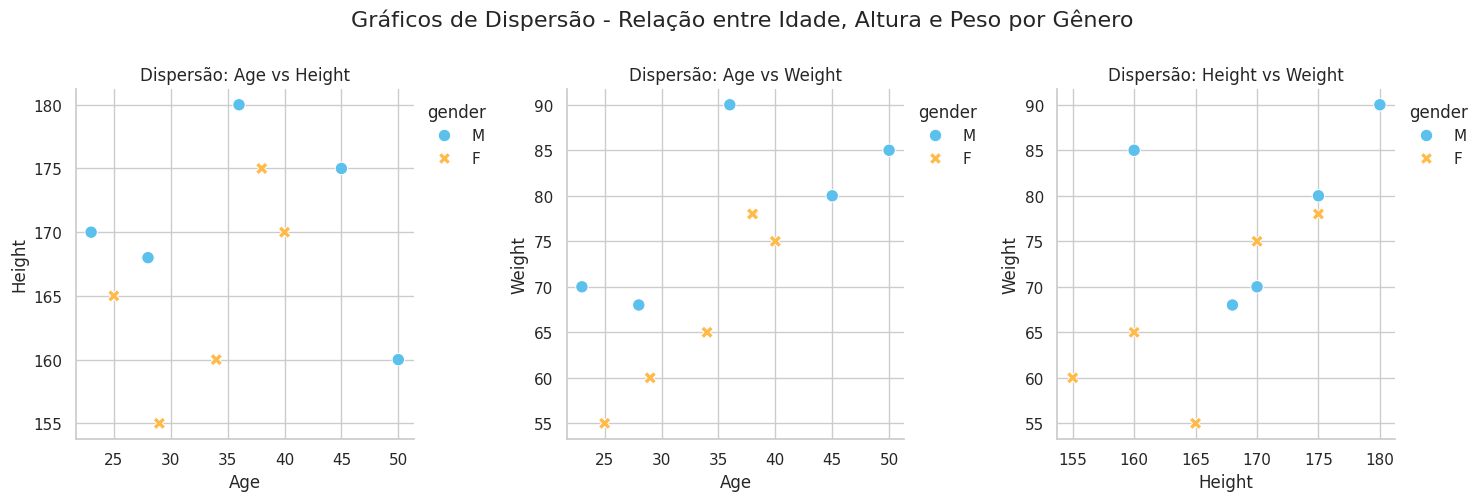

In [12]:
# Gerar scatterplots para múltiplas colunas de um DataFrame, em subplots lado a lado
# Relacionando as colunas Idade, peso e Altura
# Agrupando pela coluna Gênero

# Definindo o estilo
sns.set(style="whitegrid")

# Criando a figura e definindo os eixos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Lista de pares de colunas
pares_colunas = [("age", "height"), ("age", "weight"), ("height", "weight")]

# Iterando pelas colunas e eixos para criar os scatterplots
for (x_col, y_col), ax in zip(pares_colunas, axes):
    sns.scatterplot(
        x=x_col,
        y=y_col,
        data=df_saude,
        ax=ax,
        hue="gender",
        style="gender",
        s=80,
        palette="blend:#5BC0EB,#FFBA49"
    )

    # Definindo título e rótulos
    ax.set_title(f"Dispersão: {x_col.capitalize()} vs {y_col.capitalize()}")
    ax.set_xlabel(x_col.capitalize())
    ax.set_ylabel(y_col.capitalize())

    # Removendo as spines do topo e da direita
    sns.despine(ax=ax, top=True, right=True)

    # Movendo a caixa de legenda
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Definindo título
fig.suptitle(
    "Gráficos de Dispersão - Relação entre Idade, Altura e Peso por Gênero",
    fontsize=16,
    y=1,
)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### Gráficos Interativos com `Ploty`

In [13]:
# Contagem de registros por Gênero
gender_counts = df_saude["gender"].value_counts().reset_index()

# Gráfico de Barras
fig = px.bar(
    gender_counts,  # Dataframe
    x="count",  # Define Eixo X
    y="gender",  # Define Eixo Y
    color="gender",  # Altera a cor das barras
    color_discrete_map={"M": "#5BC0EB", "F": "#FF007F"},  # Define cor das barras
    labels={"gender": "Gênero", "count": "Contagem"},  # Rótulos
    title="Distribuição de Gênero",  # Título
)

# Personalizando o gráfico
fig.update_layout(
    plot_bgcolor="white",  # Cor de fundo do gráfico
    paper_bgcolor="white",  # Cor de fundo da área de exibição
    font=dict(color="black"),  # Cor do texto
    xaxis=dict(showgrid=True, gridcolor="lightgrey"),  # Linhas do grid no eixo x
    yaxis=dict(showgrid=True, gridcolor="lightgrey"),  # Linhas do grid no eixo y
    width=1000,  # Largura do gráfico em pixels
    height=500,  # Altura do gráfico em pixels
    margin=dict(
        l=50, r=50, t=50, b=50
    ),  # Ajusta margens esquerda (l), direita (r), superior (t) e inferior (b)
)

# Mostrando o gráfico
fig.show()

In [14]:
# Contagem de registros por Gênero e Faixa Etária

# Criando uma cópia do DataFrame
df_copia = df_saude.copy()

# Definir a faixa etária com base na idade
def definir_faixa_etaria(age):
    if age <= 20:
        return "0 a 20"
    elif age <= 30:
        return "21 a 30"
    elif age <= 40:
        return "31 a 40"
    elif age <= 50:
        return "41 a 50"
    else:
        return "acima de 50"

# Criando coluna "age_group"
df_copia["age_group"] = df_copia["age"].apply(definir_faixa_etaria)

# Ordenando dataframe
df_copia.sort_values(by="age_group", inplace=True)

# Visualizando os dados
df_copia.sample(5)

,id,age,height,weight,gender,age_group
4,5,36,180,90,M,31 a 40
5,6,40,170,75,F,31 a 40
1,2,34,160,65,F,31 a 40
6,7,29,155,60,F,21 a 30
2,3,45,175,80,M,41 a 50


In [15]:
# Gráfico de Barras
fig = px.bar(
    df_copia,  # Dataframe
    x="age_group",  # Define Eixo X
    color="gender",  # Altera a cor das barras
    color_discrete_map={"M": "#5BC0EB", "F": "#FF007F"},  # Define cor das barras
    barmode="group",  # Define tipo de agrupamento
    labels={
        "gender": "Gênero",
        "count": "Contagem",
        "age_group": "Faixa Etária",
    },  # Rótulos
    title="Distribuição de Gênero e Faixa Etária",  # Título
)

# Personalizando o gráfico
fig.update_layout(
    plot_bgcolor="white",  # Cor de fundo do gráfico
    paper_bgcolor="white",  # Cor de fundo da área de exibição
    font=dict(color="black"),  # Cor do texto
    xaxis=dict(showgrid=True, gridcolor="lightgrey"),  # Linhas do grid no eixo x
    yaxis=dict(showgrid=True, gridcolor="lightgrey"),  # Linhas do grid no eixo y
    width=1000,  # Largura do gráfico em pixels
    height=500,  # Altura do gráfico em pixels
    margin=dict(
        l=50, r=50, t=50, b=50
    ),  # Ajusta margens esquerda (l), direita (r), superior (t) e inferior (b)
)

# Mostrando o gráfico
fig.show()

## Proposta do Desafio - Parte II

### Descrição
Neste desafio, você deverá analisar uma série temporal de dados de vendas. Criar gráficos que apresentem as vendas ao longo do tempo e identificar tendências e sazonalidades.

### Tarefas
1. Carregue os dados de um arquivo CSV fornecido (`vendas.csv`).
2. Crie um gráfico de linhas das vendas ao longo do tempo usando **Matplotlib**.
3. Crie um gráfico de decomposição sazonal usando **Seaborn**.
4. Crie um gráfico interativo que permita explorar os dados de vendas ao longo do tempo usando **Plotly**.

### Conhecendo a base de dados

In [16]:
# Importação da base de dados
df_vendas = pd.read_csv("vendas.csv")

# Converter a coluna 'date' para datetime
df_vendas["date"] = pd.to_datetime(df_vendas["date"])

# Ordenar registros pela coluna 'date'
df_vendas.sort_values(by="date", inplace=True)

# Visualizando os dados
df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [17]:
# Tipos de variáveis
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31 non-null     datetime64[ns]
 1   sales   31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes


In [18]:
# Estatísticas descritivas das variáveis numéricas
df_vendas.describe()

,date,sales
count,31,31.000000
mean,2023-01-16 00:00:00,258.387097
min,2023-01-01 00:00:00,100.000000
25%,2023-01-08 12:00:00,200.000000
50%,2023-01-16 00:00:00,250.000000
75%,2023-01-23 12:00:00,325.000000
max,2023-01-31 00:00:00,400.000000
std,NaN,82.101432


In [19]:
# Valores faltantes
df_vendas.isnull().sum()

date     0
sales    0
dtype: int64

### Série Temporal com `Matplotib`

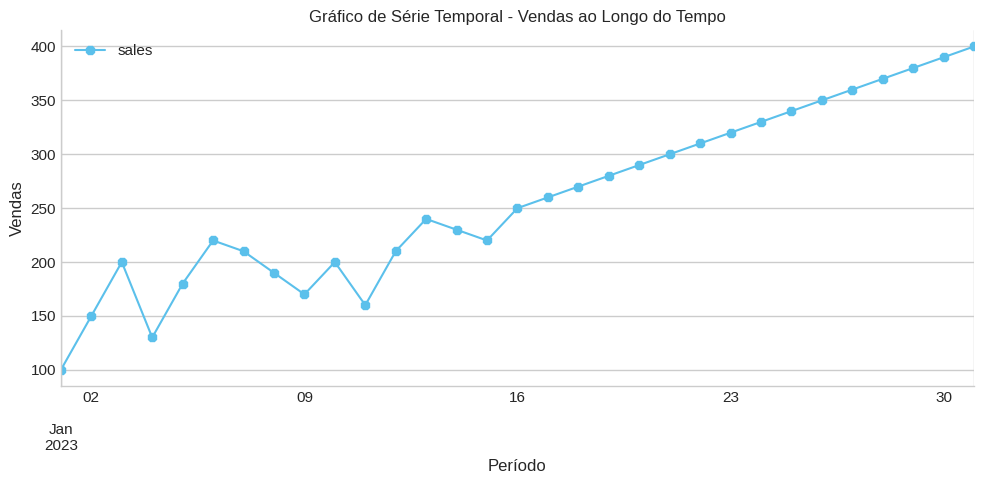

In [20]:
# Gerar gráfico de linha da Série Temporal

# Trabalhar com uma cópia do dataframe para não modificar o original
df_copia = df_vendas.copy()
df_copia.set_index("date", inplace=True)

# Definindo o estilo
plt.style.use("seaborn-v0_8-whitegrid")

# Criar o gráfico de linha
ax = df_copia.plot(figsize=(10, 5), color="#5BC0EB", marker="8")

# Definindo título e rótulos
ax.set_title("Gráfico de Série Temporal - Vendas ao Longo do Tempo")
ax.set_xlabel("Período")
ax.set_ylabel("Vendas")

# Removendo as spines do topo e da direita
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### Decomposição Sazonal com `Seaborn`

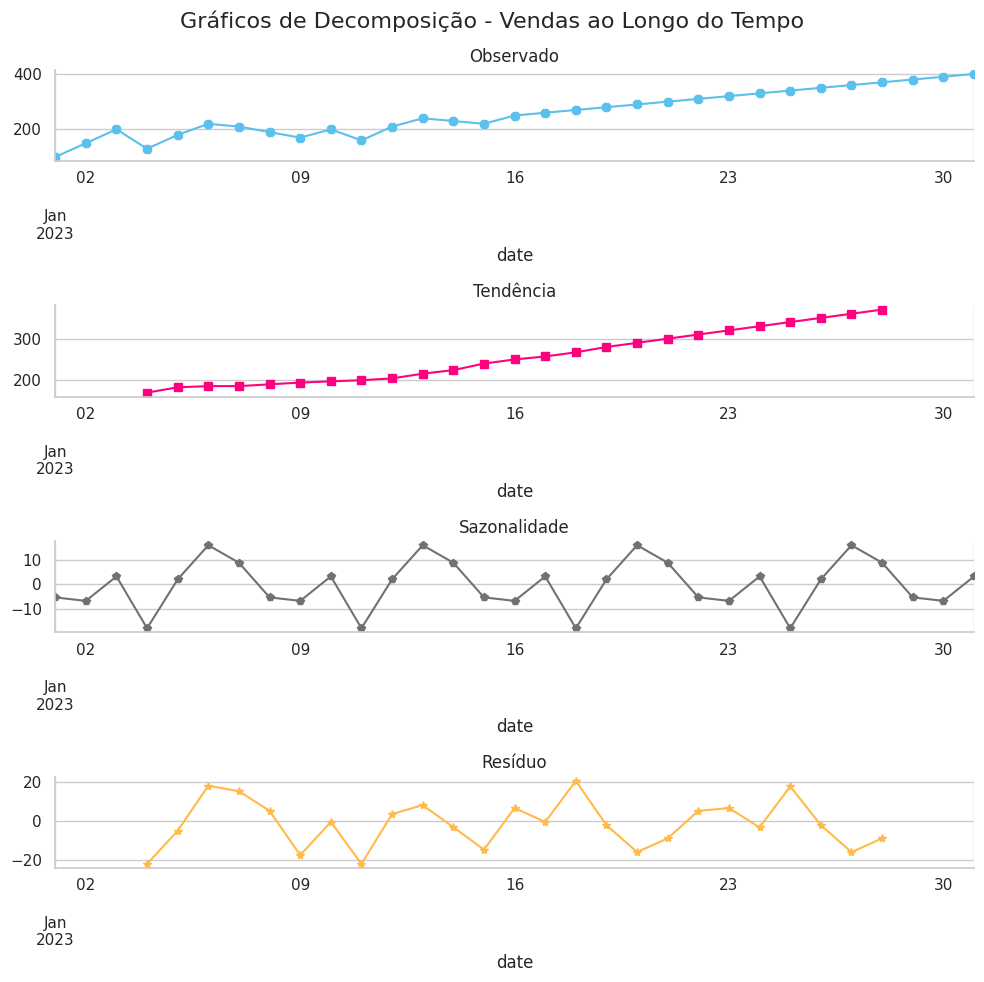

In [21]:
# Decomposição sazonal
decomposition = seasonal_decompose(df_copia["sales"], model="additive")

# Plotar os componentes
components = [
    (decomposition.observed, "Observado"),
    (decomposition.trend,    "Tendência"),
    (decomposition.seasonal, "Sazonalidade"),
    (decomposition.resid,    "Resíduo"),
]

# Definindo o estilo
sns.set(style="whitegrid")
cores = ["#5BC0EB", "#FF007F", "#717171", "#FFBA49"]
marcadores = ["8", "s", "p", "*"]

# Criando a figura e definindo os eixos
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Gráficos
for ax, (component, title), cor, marcador in zip(axs, components, cores, marcadores):
    component.plot(ax=ax, color=cor, marker=marcador)

    # Definindo título
    ax.set_title(title)

    # Removendo as spines do topo e da direita
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Definindo título
fig.suptitle("Gráficos de Decomposição - Vendas ao Longo do Tempo", fontsize=16)

# Ajustar o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### Série Temporal com `Ploty`

In [22]:
# Trabalhar com uma cópia do dataframe para não modificar o original
df_copia = df_vendas.copy()

# Cria coluna 'sales_cumulative'
df_copia['sales_cumulative'] = df_vendas['sales'].cumsum()

# Definindo estilo e rótulos
cores = {"sales": "#5BC0EB", "sales_cumulative": "#FF007F"}
labels = {"sales": "Vendas Diárias", "sales_cumulative": "Vendas Acumuladas"}

# Criando o app Dash
app = Dash(__name__)

# Layout da aplicação
app.layout = html.Div(
    [
        html.H4("Gráfico de Área - Vendas ao Longo do Tempo"),
        html.P("Selecione a coluna para o eixo Y:"),
        dcc.Dropdown(
            id="y-axis",
            options=[
                {"label": "Vendas Diárias", "value": "sales"},
                {"label": "Vendas Acumuladas", "value": "sales_cumulative"},
            ],
            value="sales",  # Valor inicial
        ),
        dcc.Graph(id="graph"),
    ]
)

# Callback para atualizar o gráfico com base na seleção do dropdown
@app.callback(Output("graph", "figure"), [Input("y-axis", "value")])
def update_graph(y_axis):
    # Gráfico de área com base na seleção do dropdown
    rotulo = labels[y_axis]
    cor = cores[y_axis]
    fig = px.area(
        df_copia,
        x="date",
        y=y_axis,
        labels={"date": "Período", y_axis: rotulo},  # Rótulos dinâmicos
        title="Gráfico de Área - Vendas ao Longo do Tempo",
        color_discrete_sequence=[cor],
        markers=True,
    )

    # Personalizando o gráfico
    fig.update_layout(
        plot_bgcolor="white",  # Cor de fundo do gráfico
        paper_bgcolor="white",  # Cor de fundo da área de exibição
        font=dict(color="black"),  # Cor do texto
        xaxis=dict(showgrid=True, gridcolor="lightgrey"),  # Linhas do grid no eixo x
        yaxis=dict(showgrid=True, gridcolor="lightgrey"),  # Linhas do grid no eixo y
        width=1000,  # Largura do gráfico em pixels
        height=500,  # Altura do gráfico em pixels
        margin=dict(
            l=50, r=50, t=50, b=50
        ),  # Ajusta margens esquerda (l), direita (r), superior (t) e inferior (b)
    )
    return fig

# Executando o app
if __name__ == "__main__":
    app.run_server(debug=True)

<IPython.core.display.Javascript object>